<a href="https://colab.research.google.com/github/Prince-6706/Movie_watch/blob/main/Prince_202401100300182.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

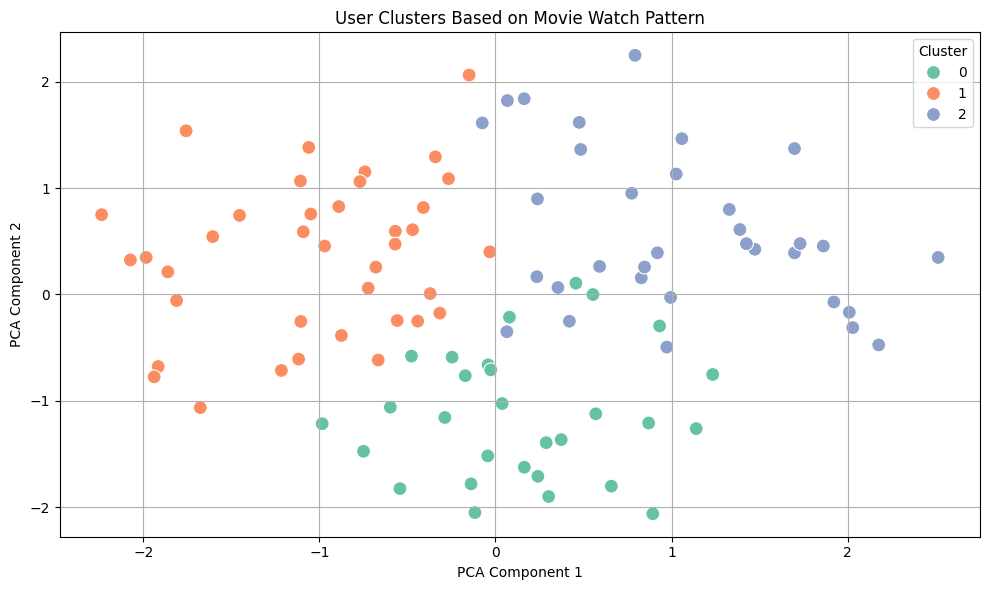

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("movie_watch.csv")

# Encode the categorical genre column
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genre_preference'])

# Select and scale the features
features = df[['watch_time_hour', 'genre_encoded', 'avg_rating_given']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Reduce dimensions with PCA for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)
df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='Set2', s=100)
plt.title('User Clusters Based on Movie Watch Pattern')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()